Accuracy: 0.7689873417721519
Precision: 0.8321329269197554
Recall: 0.7689873417721519


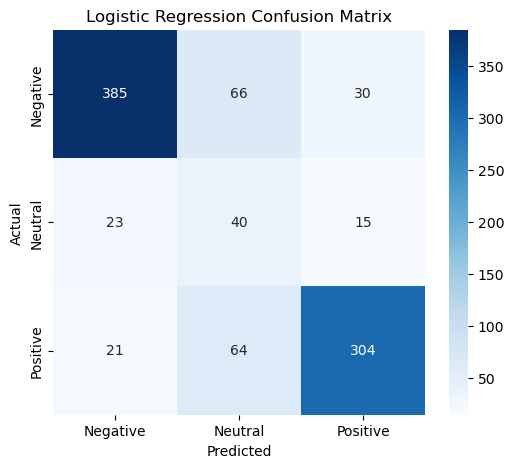

              precision    recall  f1-score     support
Negative       0.897436  0.800416  0.846154  481.000000
Neutral        0.235294  0.512821  0.322581   78.000000
Positive       0.871060  0.781491  0.823848  389.000000
accuracy       0.768987  0.768987  0.768987    0.768987
macro avg      0.667930  0.698242  0.664194  948.000000
weighted avg   0.832133  0.768987  0.793922  948.000000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report  
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

# Load dataset
df = pd.read_csv("../datasets/labeled_data/ethiopian_airlines_overall_sentiment_final.csv")

# Encode sentiment labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['overall_sentiment'])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['review_comment']).toarray()
y = df['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights for balancing
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

# Train Model with class weights
model = LogisticRegression(max_iter=200, class_weight=class_weight_dict)
model.fit(X_train, y_train)

# Save model, encoder, and vectorizer
joblib.dump(model, "../models/logistic_regression/logreg_model.joblib")
joblib.dump(label_encoder, "../models/logistic_regression/label_encoder.joblib")
joblib.dump(vectorizer, "../models/logistic_regression/tfidf_vectorizer.joblib")

# Predictions & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: Classification Report (per label metrics)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)